# Kaggle House Price Prob.

2018.10.20.Sat. Taeu

for Google Machine learning study

*******************************************************

# Content
## 1. Data Skimming

    1-0. Data collect
    1-1. Data load
    1-2. Data Skimming


## 2. Data Preprocessing
    2-1. Drop
    2-2. Fill NAs
    2-3. Editing ( Adding, Editing, Binning etc..)
    
    
## 3. Model & Evaluation

    3-1 pipeline
    3-2 Model Selection & Eval
    3-3 Result
    
    
*******************************************************

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor


## 1. Data Skimming

In [2]:
# 1-1. data load

train = pd.read_csv('input_hp/train.csv')
test = pd.read_csv('input_hp/test.csv')

In [44]:
full = pd.concat([train,test],ignore_index=True)

In [3]:
l = train.columns

In [45]:
nl = full.isnull().sum()
nl = nl[nl>0]

In [46]:
nl_index = nl.index
nl_index.size

35

In [48]:
datatype = []
datavalue= []
datacols = []
datanull = []
for i in range(l.size):
    var = l[i]
    datacols += [var]
    datatype += [train[var].dtype]
    datavalue += [train[var][0]]
    if var in nl_index :
        datanull += [nl[var]]
    else :
        datanull += [0]

In [49]:

id = list(range(l.size))

In [50]:
len(datacols)

81

In [51]:
## Saving to CSV
## Dataframe to CSV file to make a checklist for columns
## 필요한 것들은 , columns names, columns dtype, columns value 등등
pd.DataFrame({'num': id, 'columns': datacols, 'datanull':datanull ,'datavalue':datavalue,
              'datatype': datatype }).to_csv('hp_columns_info3.csv', index =False)

## 2. Data Preprocessing

### 2-1. drop

In [65]:
drop_index = ['SalePrice','Id']
for var in drop_index:
    full.drop([var],axis=1,inplace = True)

### 2-2. Missing Value

In [53]:
full.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])
full['LotAreaCut']= pd.qcut(full.LotArea,10)
full.groupby(['LotAreaCut'])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                           mean median count
LotAreaCut                                  
(1299.999, 4922.4]    35.741036   34.0   251
(4922.4, 7007.6]      55.460674   52.0   267
(7007.6, 7960.4]      63.008000   62.0   250
(7960.4, 8741.0]      66.964844   65.0   256
(8741.0, 9453.0]      70.106996   70.0   243
(9453.0, 10151.6]     73.972656   75.0   256
(10151.6, 11001.2]    73.650794   75.0   252
(11001.2, 12203.8]    83.377193   82.0   228
(12203.8, 14300.6]    84.991228   85.0   228
(14300.6, 215245.0]   94.188119   90.0   202

In [54]:
full['LotFrontage'] = full.groupby(['LotAreaCut','Neighborhood'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [55]:
full['LotFrontage'].isnull().sum()

9

In [57]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

for var in nl_index:
    na_value = 0
    if full[var].dtype == object :
        na_value = "None"
    full[var].fillna(na_value, inplace = True)

In [60]:
a = full.isnull().sum()
a[a>0]

# test에서 Sale Price는 어차피 나중에 따로 뺄거임

Series([], dtype: int64)

### 2-3. Feature Engineering

(1) type 변경

(2) scale 조정

(3) categorical 변수 조정

In [69]:
#(1) type 변경
full_col = full.columns
for var in full_col:
    if full[var].dtype == object :
        full[var] = full[var].astype(str)

In [73]:
time = ['GarageYrBlt','YearBuilt','YearRemodAdd','MoSold','YrSold']
categorical = ['MSSubClass','OverallQual','OverallCond',]
strtype = time + categorical
for var in strtype:
    full[var] = full[var].astype(str)

In [123]:

type(full['MSSubClass'][0]) != str

False

In [104]:
full['Functional'].dtype == object

True

In [ ]:
## int -> float 해주어야할까? DNN 뺴고는 봐야할 듯 

In [78]:
## (2) Scale 변환 
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler

minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

# ~.fit(data)

In [80]:
# python 문법 주의할 점. full1 = full 과 full1 = full.copy()는 다름 후자가 값만 복사, 전자는 주소 공유
full1 = full.copy()
full2 = full.copy()
full3 = full.copy()
full4 = full.copy()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,LotAreaCut
0,-0.441838,1.213068,0.0,None,0.0,1Fam,TA,No,0.461119,0.0,...,0.0,Pave,1.0,-0.261297,AllPub,0.000000,2003,2003,2008,"(7960.4, 8741.0]"
1,0.351906,0.000000,0.0,None,0.0,1Fam,TA,Gd,0.832196,0.0,...,0.0,Pave,0.0,0.536346,AllPub,1.773810,1976,1976,2007,"(9453.0, 10151.6]"
2,-0.316716,1.230114,0.0,None,0.0,1Fam,TA,Mn,0.160982,0.0,...,0.0,Pave,0.0,-0.135560,AllPub,0.000000,2001,2002,2008,"(11001.2, 12203.8]"
3,-0.236559,1.073864,0.0,None,0.0,1Fam,Gd,No,-0.207367,0.0,...,0.0,Pave,0.5,-0.457760,AllPub,0.000000,1915,1970,2006,"(9453.0, 10151.6]"
4,0.123167,1.495739,0.0,None,1.0,1Fam,TA,Av,0.391542,0.0,...,0.0,Pave,1.5,0.306483,AllPub,1.142857,2000,2000,2008,"(12203.8, 14300.6]"


In [126]:
numeric_col = []
for var in full_col:
    if type(full[var][0]) != str:
        print(var)
        numeric_col += [var]

1stFlrSF
2ndFlrSF
3SsnPorch
BedroomAbvGr
BsmtFinSF1
BsmtFinSF2
BsmtFullBath
BsmtHalfBath
BsmtUnfSF
EnclosedPorch
Fireplaces
FullBath
GarageArea
GarageCars
GrLivArea
HalfBath
KitchenAbvGr
LotArea
LotFrontage
LowQualFinSF
MasVnrArea
MiscVal
OpenPorchSF
PoolArea
ScreenPorch
TotRmsAbvGrd
TotalBsmtSF
WoodDeckSF
LotAreaCut


In [137]:
numeric_col # LotAreaCut 빼줌. .pop으로

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [140]:
full2[numeric_col] = minmax.fit_transform(full2[numeric_col])

In [141]:
full3[numeric_col] = standard.fit_transform(full3[numeric_col])
full4[numeric_col] = robust.fit_transform(full4[numeric_col])

#X[skewness_features] = np.log1p(X[skewness_features])

In [144]:
full4[numeric_col].head(3)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF
0,-0.441838,1.213068,0.0,0.0,0.461119,0.0,1.0,0.000000,-0.541880,0.0,...,-0.25,0.0,1.198777,0.0,0.500000,0.0,0.0,1.0,-0.261297,0.00000
1,0.351906,0.000000,0.0,0.0,0.832196,0.0,0.0,4.072227,-0.312821,0.0,...,0.50,0.0,0.000000,0.0,-0.371429,0.0,0.0,0.0,0.536346,1.77381
2,-0.316716,1.230114,0.0,0.0,0.160982,0.0,1.0,0.000000,-0.056410,0.0,...,-0.10,0.0,0.990826,0.0,0.228571,0.0,0.0,0.0,-0.135560,0.00000


In [214]:
full2[numeric_col].head(3)
# full2 = full.copy() 이걸 써야하구나.
# 다 같은 값이 되버렸구나. 다시 확인해서 문제 풀자. copy 써야되나.

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF
0,-0.441838,1.213068,0.0,0.0,0.461119,0.0,1.0,0.000000,-0.541880,0.0,...,-0.25,0.0,1.198777,0.0,0.500000,0.0,0.0,1.0,-0.261297,0.00000
1,0.351906,0.000000,0.0,0.0,0.832196,0.0,0.0,4.072227,-0.312821,0.0,...,0.50,0.0,0.000000,0.0,-0.371429,0.0,0.0,0.0,0.536346,1.77381
2,-0.316716,1.230114,0.0,0.0,0.160982,0.0,1.0,0.000000,-0.056410,0.0,...,-0.10,0.0,0.990826,0.0,0.228571,0.0,0.0,0.0,-0.135560,0.00000


In [207]:
full1[numeric_col] = full1[numeric_col].astype('float32')

In [ ]:
## (3) categorical 변수 조정
full.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])

In [ ]:
full["oMSSubClass"] = full.MSSubClass.map({'180':1, 
                                    '30':2, '45':2, 
                                    '190':3, '50':3, '90':3, 
                                    '85':4, '40':4, '160':4, 
                                    '70':5, '20':5, '75':5, '80':5, '150':5,
                                    '120': 6, '60':6})

## 3. Model & Evaluation

### 3-1. Pipeline

In [153]:

full2.head(4)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,LotAreaCut
0,-0.441838,1.213068,0.0,None,0.0,1Fam,TA,No,0.461119,0.0,...,0.0,Pave,1.0,-0.261297,AllPub,0.00000,2003,2003,2008,"(7960.4, 8741.0]"
1,0.351906,0.000000,0.0,None,0.0,1Fam,TA,Gd,0.832196,0.0,...,0.0,Pave,0.0,0.536346,AllPub,1.77381,1976,1976,2007,"(9453.0, 10151.6]"
2,-0.316716,1.230114,0.0,None,0.0,1Fam,TA,Mn,0.160982,0.0,...,0.0,Pave,0.0,-0.135560,AllPub,0.00000,2001,2002,2008,"(11001.2, 12203.8]"
3,-0.236559,1.073864,0.0,None,0.0,1Fam,Gd,No,-0.207367,0.0,...,0.0,Pave,0.5,-0.457760,AllPub,0.00000,1915,1970,2006,"(9453.0, 10151.6]"


In [156]:
full1 = pd.get_dummies(full1)
full2 = pd.get_dummies(full2)
full3 = pd.get_dummies(full3)
full4 = pd.get_dummies(full4)

In [164]:
full2.shape

(2919, 647)

In [165]:
# full 로 부터 train , test set 분리
y = train['SalePrice']
y_log = np.log(y)

In [202]:
n_train = train.shape[0]
x1 = full1[:n_train]
x2 = full2[:n_train]
x3 = full3[:n_train]
x4 = full4[:n_train]

test_x1 = full1[n_train:]
test_x2 = full2[n_train:]
test_x3 = full3[n_train:]
test_x4 = full4[n_train:]

In [168]:
x2.shape

(1460, 647)

In [171]:
lasso = Lasso(alpha = 0.001)
lasso.fit(x4,y_log)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [173]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=full4.columns)

In [174]:
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
OverallQual_9,0.131891
GrLivArea,0.129908
Neighborhood_Crawfor,0.105718
OverallQual_8,0.094890
Neighborhood_NridgHt,0.075234
GarageCars,0.070723
Neighborhood_StoneBr,0.064883
BsmtQual_Ex,0.064852
Functional_Typ,0.063870
KitchenQual_Ex,0.063296


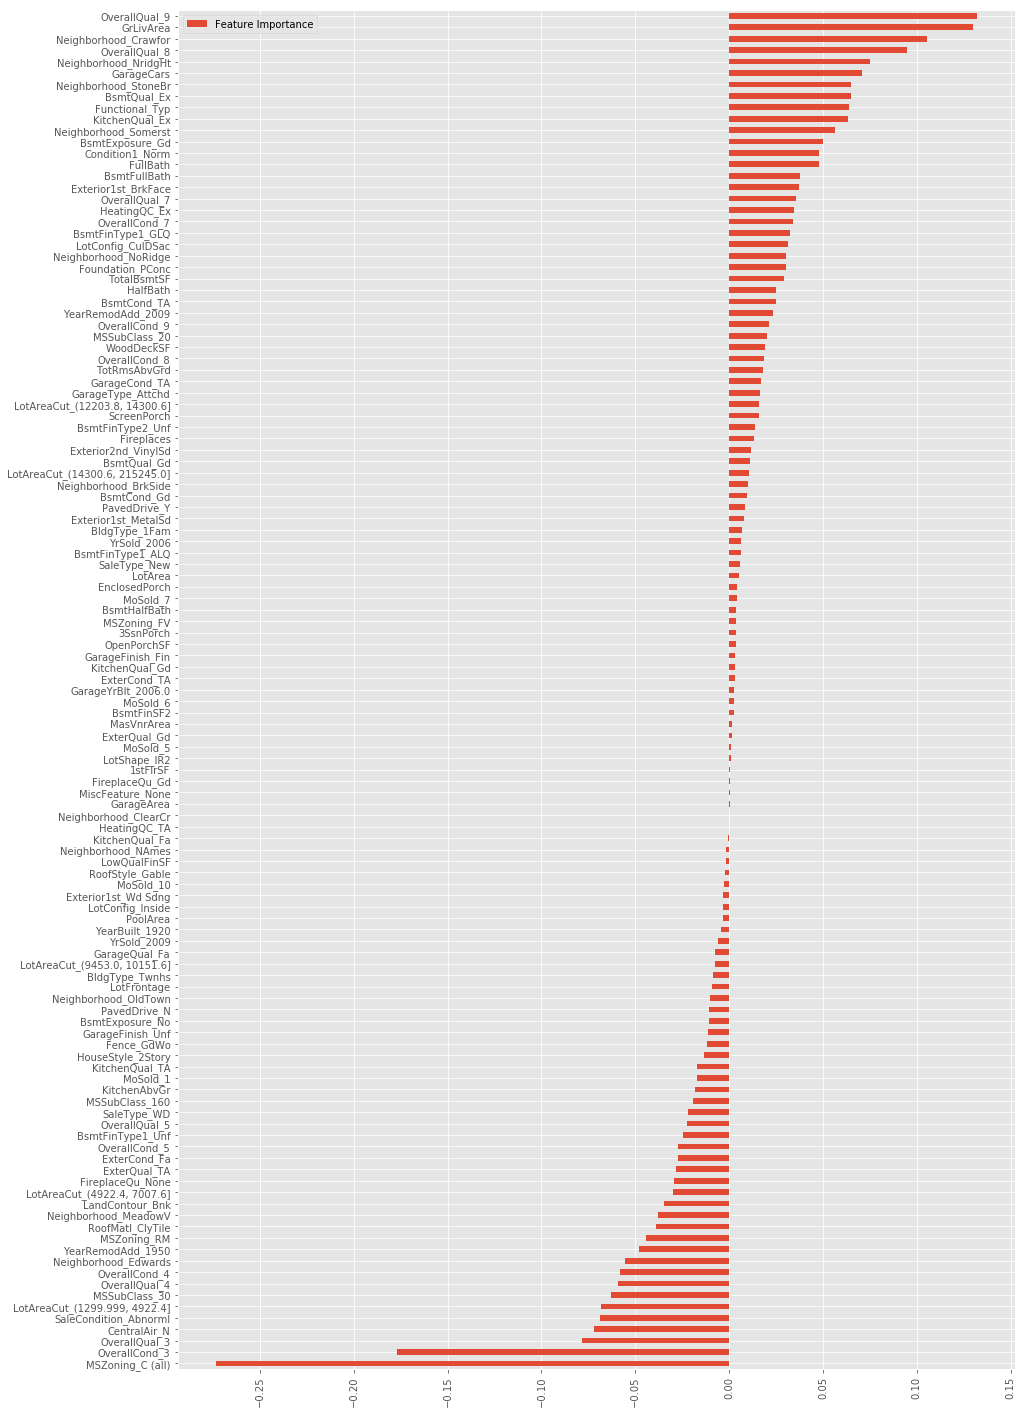

In [175]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

### 3-2. Model

In [177]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [178]:
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

In [ ]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra"]
for name, model in zip(names, models):
    score = rmse_cv(model, x1 , y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

In [182]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra"]
for name, model in zip(names, models):
    score = rmse_cv(model, x4 , y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 1064849966.140875, 1265085675.9552
Ridge: 0.154419, 0.0210
Lasso: 0.180684, 0.0250
RF: 0.158441, 0.0074
GBR: 0.136318, 0.0109
SVR: 0.134515, 0.0127
LinSVR: 0.172540, 0.0205
Ela: 0.136044, 0.0241
SGD: 0.257561, 0.0129
Bay: 0.142171, 0.0213
Ker: 0.139976, 0.0202
Extra: 0.164672, 0.0143


In [183]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra"]
for name, model in zip(names, models):
    score = rmse_cv(model, x3 , y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 1064849966.140875, 1265085675.9552
Ridge: 0.154419, 0.0210
Lasso: 0.180684, 0.0250
RF: 0.160845, 0.0089
GBR: 0.136732, 0.0113
SVR: 0.134515, 0.0127
LinSVR: 0.175197, 0.0187
Ela: 0.136044, 0.0241
SGD: 0.268964, 0.0154
Bay: 0.142171, 0.0213
Ker: 0.139976, 0.0202
Extra: 0.162791, 0.0163


In [184]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra"]
for name, model in zip(names, models):
    score = rmse_cv(model, x2 , y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 1064849966.140875, 1265085675.9552
Ridge: 0.154419, 0.0210
Lasso: 0.180684, 0.0250
RF: 0.158777, 0.0059
GBR: 0.137186, 0.0106
SVR: 0.134515, 0.0127
LinSVR: 0.171666, 0.0217
Ela: 0.136044, 0.0241
SGD: 0.306393, 0.0938
Bay: 0.142171, 0.0213
Ker: 0.139976, 0.0202
Extra: 0.162917, 0.0139


In [185]:
## Grid Search
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

## lasso

In [186]:
grid(Lasso()).grid_get(x2,y_log,{'alpha': [0.0004,0.0005,0.0007,0.0009],'max_iter':[10000]})

{'alpha': 0.0007, 'max_iter': 10000} 0.13798894800829403
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.138933        0.007299
1  {'alpha': 0.0005, 'max_iter': 10000}         0.138262        0.007273
2  {'alpha': 0.0007, 'max_iter': 10000}         0.137989        0.007248
3  {'alpha': 0.0009, 'max_iter': 10000}         0.138939        0.007282


In [187]:
grid(Lasso()).grid_get(x3,y_log,{'alpha': [0.0004,0.0005,0.0007,0.0009],'max_iter':[10000]})

{'alpha': 0.0007, 'max_iter': 10000} 0.13798894800829403
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.138933        0.007299
1  {'alpha': 0.0005, 'max_iter': 10000}         0.138262        0.007273
2  {'alpha': 0.0007, 'max_iter': 10000}         0.137989        0.007248
3  {'alpha': 0.0009, 'max_iter': 10000}         0.138939        0.007282


In [188]:
grid(Lasso()).grid_get(x4,y_log,{'alpha': [0.0004,0.0005,0.0007,0.0009],'max_iter':[10000]})

{'alpha': 0.0007, 'max_iter': 10000} 0.13798894800829403
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.138933        0.007299
1  {'alpha': 0.0005, 'max_iter': 10000}         0.138262        0.007273
2  {'alpha': 0.0007, 'max_iter': 10000}         0.137989        0.007248
3  {'alpha': 0.0009, 'max_iter': 10000}         0.138939        0.007282


## Ridge

In [193]:
grid(Ridge()).grid_get(x2,y_log,{'alpha':[35,40,45,50,55,60,65,70,80,90]})

{'alpha': 35} 0.14389422817792108
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.143894        0.006855
1  {'alpha': 40}         0.144336        0.006915
2  {'alpha': 45}         0.144796        0.006967
3  {'alpha': 50}         0.145260        0.007011
4  {'alpha': 55}         0.145723        0.007049
5  {'alpha': 60}         0.146180        0.007082
6  {'alpha': 65}         0.146629        0.007110
7  {'alpha': 70}         0.147067        0.007134
8  {'alpha': 80}         0.147911        0.007171
9  {'alpha': 90}         0.148709        0.007198


In [194]:
grid(Ridge()).grid_get(x3,y_log,{'alpha':[35,40,45,50,55,60,65,70,80,90]})

{'alpha': 35} 0.14389422817792108
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.143894        0.006855
1  {'alpha': 40}         0.144336        0.006915
2  {'alpha': 45}         0.144796        0.006967
3  {'alpha': 50}         0.145260        0.007011
4  {'alpha': 55}         0.145723        0.007049
5  {'alpha': 60}         0.146180        0.007082
6  {'alpha': 65}         0.146629        0.007110
7  {'alpha': 70}         0.147067        0.007134
8  {'alpha': 80}         0.147911        0.007171
9  {'alpha': 90}         0.148709        0.007198


In [195]:
grid(Ridge()).grid_get(x4,y_log,{'alpha':[35,40,45,50,55,60,65,70,80,90]})

{'alpha': 35} 0.14389422817792108
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.143894        0.006855
1  {'alpha': 40}         0.144336        0.006915
2  {'alpha': 45}         0.144796        0.006967
3  {'alpha': 50}         0.145260        0.007011
4  {'alpha': 55}         0.145723        0.007049
5  {'alpha': 60}         0.146180        0.007082
6  {'alpha': 65}         0.146629        0.007110
7  {'alpha': 70}         0.147067        0.007134
8  {'alpha': 80}         0.147911        0.007171
9  {'alpha': 90}         0.148709        0.007198


## ElasticNet

In [196]:
grid(ElasticNet()).grid_get(x2,y_log,{'alpha':[0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3],'max_iter':[10000]})

{'alpha': 0.004, 'l1_ratio': 0.1, 'max_iter': 10000} 0.13957294722667887
                                              params  mean_test_score  \
0  {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter'...         0.148379   
1  {'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter':...         0.147051   
2  {'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter':...         0.139904   
3  {'alpha': 0.004, 'l1_ratio': 0.08, 'max_iter':...         0.139669   
4  {'alpha': 0.004, 'l1_ratio': 0.1, 'max_iter': ...         0.139573   
5  {'alpha': 0.004, 'l1_ratio': 0.3, 'max_iter': ...         0.142968   
6  {'alpha': 0.005, 'l1_ratio': 0.08, 'max_iter':...         0.139841   
7  {'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': ...         0.139930   
8  {'alpha': 0.005, 'l1_ratio': 0.3, 'max_iter': ...         0.145655   

   std_test_score  
0        0.006699  
1        0.006728  
2        0.006732  
3        0.006606  
4        0.006680  
5        0.007343  
6        0.006711  
7        0.006798  
8        0.00759

In [197]:
grid(ElasticNet()).grid_get(x3,y_log,{'alpha':[0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3],'max_iter':[10000]})

{'alpha': 0.004, 'l1_ratio': 0.1, 'max_iter': 10000} 0.13957294722667887
                                              params  mean_test_score  \
0  {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter'...         0.148379   
1  {'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter':...         0.147051   
2  {'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter':...         0.139904   
3  {'alpha': 0.004, 'l1_ratio': 0.08, 'max_iter':...         0.139669   
4  {'alpha': 0.004, 'l1_ratio': 0.1, 'max_iter': ...         0.139573   
5  {'alpha': 0.004, 'l1_ratio': 0.3, 'max_iter': ...         0.142968   
6  {'alpha': 0.005, 'l1_ratio': 0.08, 'max_iter':...         0.139841   
7  {'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': ...         0.139930   
8  {'alpha': 0.005, 'l1_ratio': 0.3, 'max_iter': ...         0.145655   

   std_test_score  
0        0.006699  
1        0.006728  
2        0.006732  
3        0.006606  
4        0.006680  
5        0.007343  
6        0.006711  
7        0.006798  
8        0.00759

In [198]:
grid(ElasticNet()).grid_get(x4,y_log,{'alpha':[0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3],'max_iter':[10000]})

{'alpha': 0.004, 'l1_ratio': 0.1, 'max_iter': 10000} 0.13957294722667887
                                              params  mean_test_score  \
0  {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter'...         0.148379   
1  {'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter':...         0.147051   
2  {'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter':...         0.139904   
3  {'alpha': 0.004, 'l1_ratio': 0.08, 'max_iter':...         0.139669   
4  {'alpha': 0.004, 'l1_ratio': 0.1, 'max_iter': ...         0.139573   
5  {'alpha': 0.004, 'l1_ratio': 0.3, 'max_iter': ...         0.142968   
6  {'alpha': 0.005, 'l1_ratio': 0.08, 'max_iter':...         0.139841   
7  {'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': ...         0.139930   
8  {'alpha': 0.005, 'l1_ratio': 0.3, 'max_iter': ...         0.145655   

   std_test_score  
0        0.006699  
1        0.006728  
2        0.006732  
3        0.006606  
4        0.006680  
5        0.007343  
6        0.006711  
7        0.006798  
8        0.00759

## Kernel Ridge

In [199]:
param_grid={'alpha':[0.2,0.3,0.4], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1]}
grid(KernelRidge()).grid_get(x2,y_log,param_grid)

{'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} 0.12936503961702106
                                              params  mean_test_score  \
0  {'alpha': 0.2, 'coef0': 0.8, 'degree': 3, 'ker...         0.133371   
1  {'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kerne...         0.129365   
2  {'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'ker...         0.138419   
3  {'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kerne...         0.132879   
4  {'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'ker...         0.142809   
5  {'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kerne...         0.136110   

   std_test_score  
0        0.004078  
1        0.004091  
2        0.004057  
3        0.004047  
4        0.004207  
5        0.004093  


In [200]:
param_grid={'alpha':[0.2,0.3,0.4], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1]}
grid(KernelRidge()).grid_get(x3,y_log,param_grid)

{'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} 0.12936503961702106
                                              params  mean_test_score  \
0  {'alpha': 0.2, 'coef0': 0.8, 'degree': 3, 'ker...         0.133371   
1  {'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kerne...         0.129365   
2  {'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'ker...         0.138419   
3  {'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kerne...         0.132879   
4  {'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'ker...         0.142809   
5  {'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kerne...         0.136110   

   std_test_score  
0        0.004078  
1        0.004091  
2        0.004057  
3        0.004047  
4        0.004207  
5        0.004093  


In [201]:
param_grid={'alpha':[0.2,0.3,0.4], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1]}
grid(KernelRidge()).grid_get(x4,y_log,param_grid)

{'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} 0.12936503961702106
                                              params  mean_test_score  \
0  {'alpha': 0.2, 'coef0': 0.8, 'degree': 3, 'ker...         0.133371   
1  {'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kerne...         0.129365   
2  {'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'ker...         0.138419   
3  {'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kerne...         0.132879   
4  {'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'ker...         0.142809   
5  {'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kerne...         0.136110   

   std_test_score  
0        0.004078  
1        0.004091  
2        0.004057  
3        0.004047  
4        0.004207  
5        0.004093  


In [217]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

lasso = Lasso(alpha=0.0005,max_iter=10000)
ridge = Ridge(alpha=60)
svr = SVR(gamma= 0.0004,kernel='rbf',C=13,epsilon=0.009)
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=0.8)
ela = ElasticNet(alpha=0.005,l1_ratio=0.08,max_iter=10000)
bay = BayesianRidge()

# assign weights based on their gridsearch score
w1 = 0.0
w2 = 0.1
w3 = 0.0
w4 = 0.4
w5 = 0.2
w6 = 0.3

weight_avg = AverageWeight(mod = [lasso,ridge,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5,w6])


score = rmse_cv(weight_avg,x4,y_log)
print(score.mean())

0.13338365961607151


## stacking

## 3.3 Result - Submission

In [221]:
# 여러모델 평균
ela = ElasticNet(alpha=0.005,l1_ratio=0.08,max_iter=10000)
r1 = lasso.fit(x4, y_log)
r2 = ridge.fit(x4,y_log)
r3 = svr.fit(x4,y_log)
r4 = ker.fit(x4,y_log)
r5 = ela.fit(x4,y_log)
r6 = bay.fit(x4,y_log)

pred_r1 =np.exp(r1.predict(test_x4))
pred_r2 =np.exp(r2.predict(test_x4))
pred_r3 =np.exp(r3.predict(test_x4))
pred_r4 =np.exp(r4.predict(test_x4))
pred_r5 =np.exp(r5.predict(test_x4))
pred_r6 =np.exp(r6.predict(test_x4))

pred_final = w1 * pred_r1 + w2 * pred_r2 + w3 * pred_r3 + w4 * pred_r4 + w5 * pred_r5 + w6 * pred_r6


result=pd.DataFrame({'Id':test.Id, 'SalePrice':pred_final})
result.to_csv("submission1.csv",index=False)

In [ ]:
## stacking  완료했으면

In [ ]:
pred = np.exp(stack_model.predict(test_X_scaled))

result = pd.DataFrame({'Id':test.Id, 'SalePrice':pred})
result.to_csv("submissionB.csv",index=False)

In [222]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "https://user-images.githubusercontent.com/24144491/47170710-adfa5800-d341-11e8-8063-fe1312148e83.png")
